In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Load Boston Housing dataset
boston = fetch_openml(name='boston', version=1)

# Access data and target
data, target = boston.data, boston.target

#Test & Train Split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

#Scaling test and train set
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_array)
X_test_scaled = scaler.transform(X_test_array)

C:\Users\HP\anaconda3\envs\jupyter\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [28]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(13,)))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss='mse',
             optimizer='rmsprop',
             metrics=['mae'])

In [63]:
model.fit(X_train_scaled,y_train_array,batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
12/12 [==============================] - 0s 23ms/step - loss: 26.7449 - mae: 3.8458 - val_loss: 33.0631 - val_mae: 3.5713
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 27.4233 - mae: 3.7796 - val_loss: 32.0536 - val_mae: 3.4986
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 28.1460 - mae: 3.8306 - val_loss: 32.5556 - val_mae: 3.4965
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 25.0129 - mae: 3.6577 - val_loss: 32.4240 - val_mae: 3.5108
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 26.3521 - mae: 3.8437 - val_loss: 32.5387 - val_mae: 3.5137
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 30.0017 - mae: 4.0020 - val_loss: 34.2203 - val_mae: 3.5818
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 28.7264 - mae: 3.8765 - val_loss: 34.3703 - val_mae: 3.5823
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 25.

In [65]:
model.evaluate(X_test_scaled,y_test_array)

4/4 [==============================] - 0s 3ms/step - loss: 18.5296 - mae: 2.5907


[18.52959632873535, 2.590688467025757]

4/4 [==============================] - 0s 4ms/step


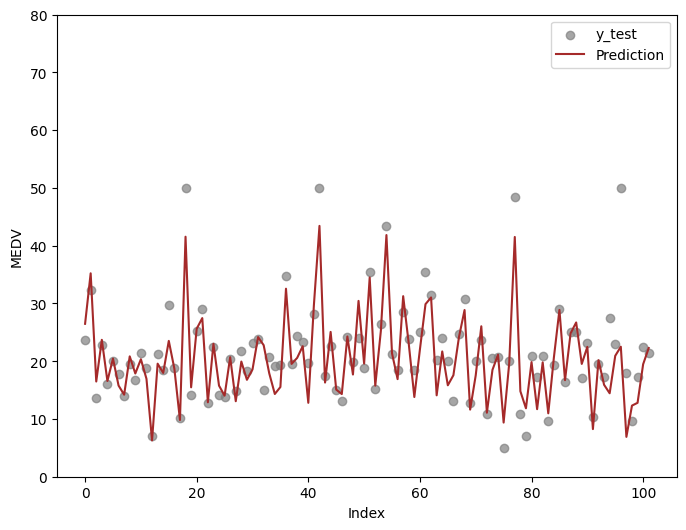

In [71]:
pred=model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test_array)), y_test_array, color='grey', label='y_test', alpha=0.7)

# Plot pred in brown
plt.plot(pred, color='brown', label='Prediction')

# Set y-axis limits
plt.ylim(0, 80)

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('MEDV')
plt.legend()

# Show the plot
plt.show()
